# Versuch 4: Sprache
von Fabian Wolter und Selin Kabak

## Fourieranalyse lang andauernder Signale

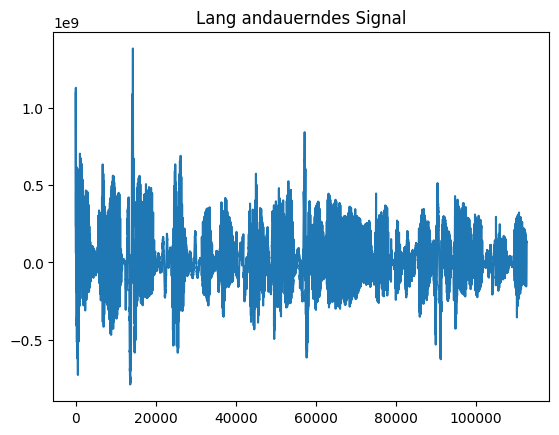

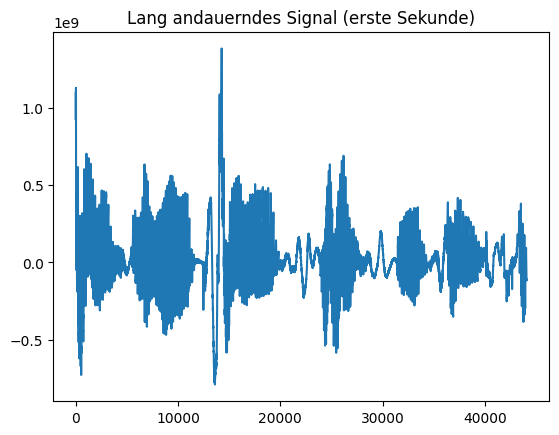

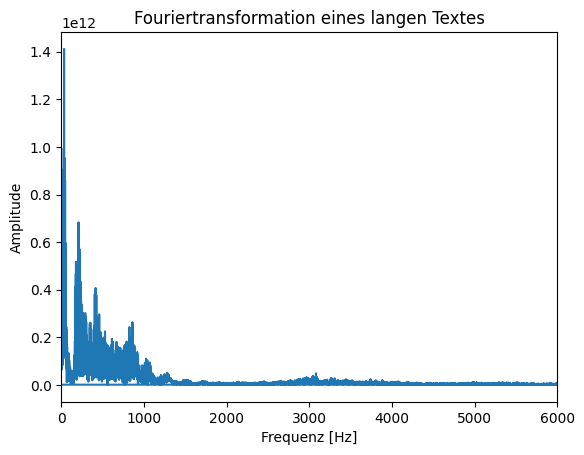

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# load file
data = np.load('langerText/rec.npy')

# plot data
plt.plot(data)
plt.title('Lang andauerndes Signal')
plt.show()

# cut to one second
data = data[:44100]

# plot data
plt.plot(data)
plt.title('Lang andauerndes Signal (erste Sekunde)')
plt.show()

# ft
ft = np.fft.fft(data)
freq = np.fft.fftfreq(len(data), d=(1/44100))
plt.plot(freq, np.abs(ft))
plt.xlim(0, 6000)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.title('Fouriertransformation eines langen Textes')
plt.show()


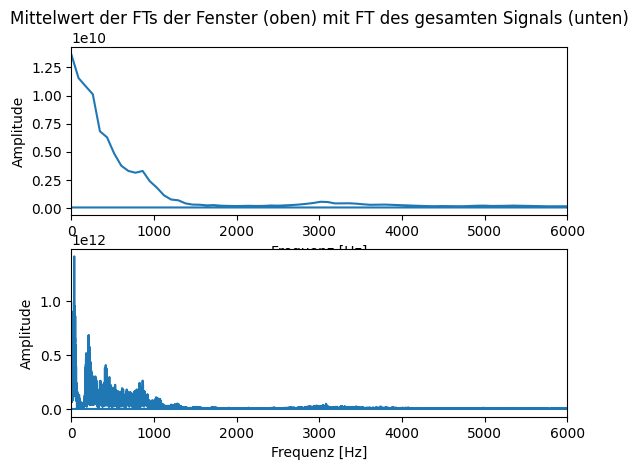

In [46]:
# windowing of signal of 512 samples each, half overlapping
windows = []
for i in range(0, len(data)-512, 256):
    windows.append(data[i:i+512])
    
# gaussian weighting of windows so that window width is 4 std deviations
windows = np.array(windows)
windows = windows * np.exp(-np.linspace(-2, 2, 512)**2)


# ft of windows
ft_windows = np.fft.fft(windows, axis=1)
freqW = np.fft.fftfreq(512, d=(1/44100))
plt.subplot(2, 1, 1)
plt.plot(freqW, np.abs(ft_windows).mean(axis=0))
plt.xlim(0, 6000)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.title('Mittelwert der FTs der Fenster (oben) mit FT des gesamten Signals (unten)')
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(ft))
plt.xlim(0, 6000)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.show()


## Spracherkennung

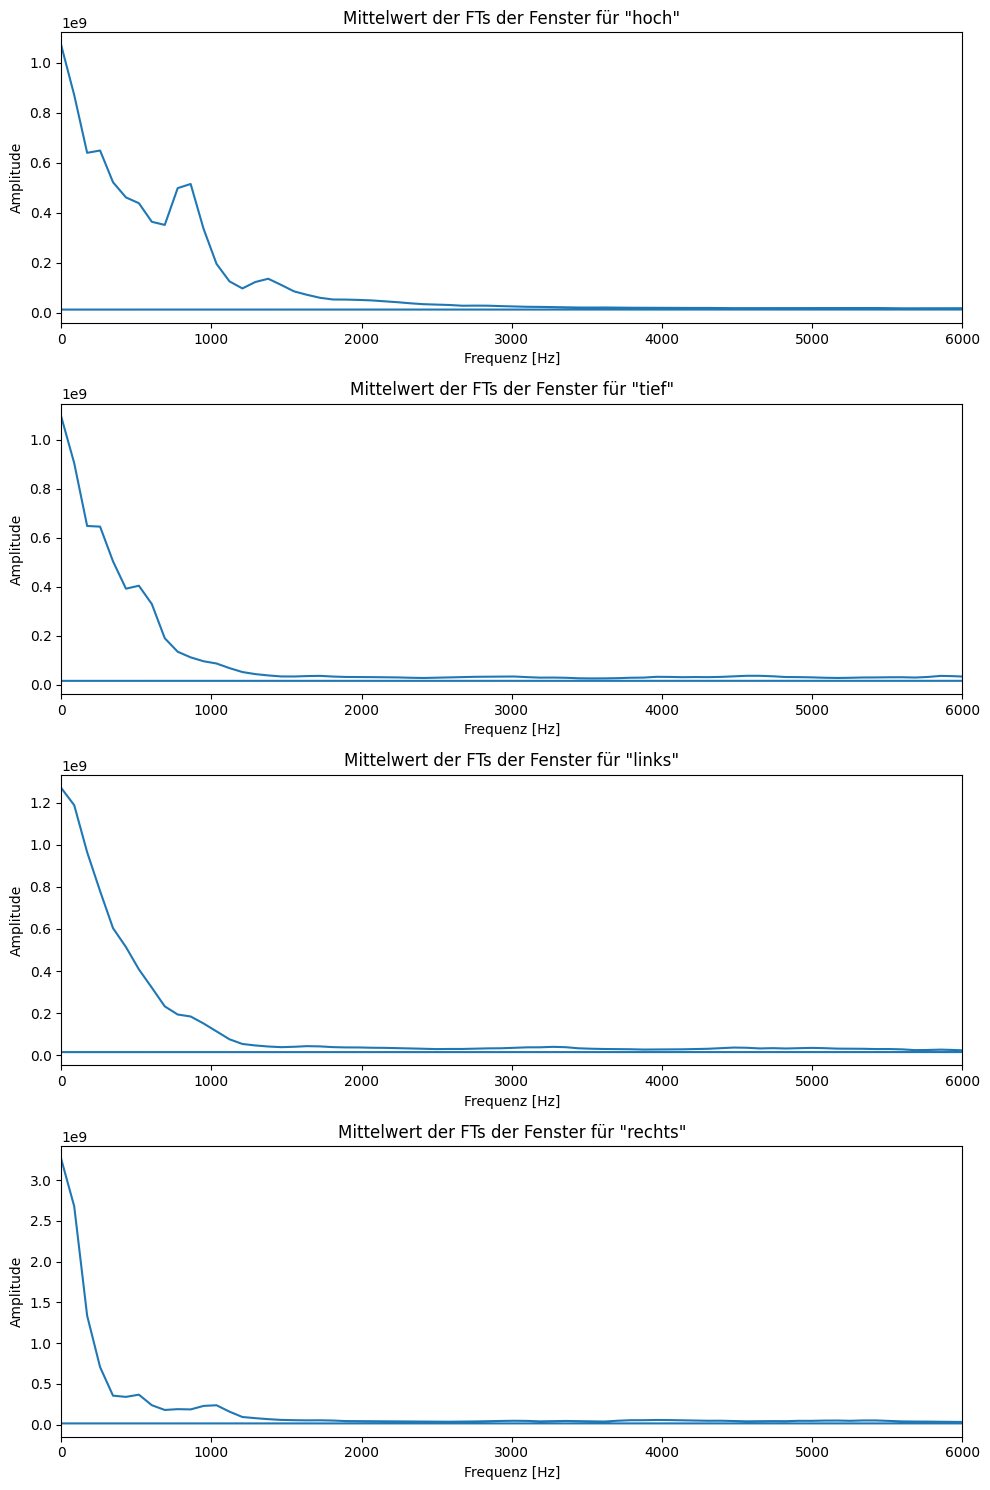

In [47]:
# load files
hoch = []
tief = []
links = []
rechts = []
for i in range(5):
    hoch.append(np.load('commands/hoch/hoch'+str(i)+'.npy'))
    tief.append(np.load('commands/tief/tief'+str(i)+'.npy'))
    links.append(np.load('commands/links/links'+str(i)+'.npy'))
    rechts.append(np.load('commands/rechts/rechts'+str(i)+'.npy'))
    
# windowing of signals
windows_hoch = []
windows_tief = []
windows_links = []
windows_rechts = []
for i in range(5):
    for j in range(0, len(hoch[i])-512, 256):
        windows_hoch.append(hoch[i][j:j+512])
    for j in range(0, len(tief[i])-512, 256):
        windows_tief.append(tief[i][j:j+512])
    for j in range(0, len(links[i])-512, 256):
        windows_links.append(links[i][j:j+512])
    for j in range(0, len(rechts[i])-512, 256):
        windows_rechts.append(rechts[i][j:j+512])
        
# gaussian weighting of windows so that window width is 4 std deviations
windows_hoch = np.array(windows_hoch)
windows_hoch = windows_hoch * np.exp(-np.linspace(-2, 2, 512)**2)
windows_tief = np.array(windows_tief)
windows_tief = windows_tief * np.exp(-np.linspace(-2, 2, 512)**2)
windows_links = np.array(windows_links)
windows_links = windows_links * np.exp(-np.linspace(-2, 2, 512)**2)
windows_rechts = np.array(windows_rechts)
windows_rechts = windows_rechts * np.exp(-np.linspace(-2, 2, 512)**2)

# ft of windows
ft_windows_hoch = np.fft.fft(windows_hoch, axis=1)
ft_windows_tief = np.fft.fft(windows_tief, axis=1)
ft_windows_links = np.fft.fft(windows_links, axis=1)
ft_windows_rechts = np.fft.fft(windows_rechts, axis=1)
freq = np.fft.fftfreq(512, d=(1/44100))

# mean of fts
mean_ft_windows_hoch = np.abs(ft_windows_hoch).mean(axis=0)
mean_ft_windows_tief = np.abs(ft_windows_tief).mean(axis=0)
mean_ft_windows_links = np.abs(ft_windows_links).mean(axis=0)
mean_ft_windows_rechts = np.abs(ft_windows_rechts).mean(axis=0)

# plot
plt.figure(figsize=(10, 15))
plt.subplot(4, 1, 1)
plt.plot(freq, mean_ft_windows_hoch)
plt.xlim(0, 6000)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.title('Mittelwert der FTs der Fenster für "hoch"')
plt.subplot(4, 1, 2)
plt.plot(freq, mean_ft_windows_tief)
plt.xlim(0, 6000)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.title('Mittelwert der FTs der Fenster für "tief"')
plt.subplot(4, 1, 3)
plt.plot(freq, mean_ft_windows_links)
plt.xlim(0, 6000)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.title('Mittelwert der FTs der Fenster für "links"') 
plt.subplot(4, 1, 4)
plt.plot(freq, mean_ft_windows_rechts)
plt.xlim(0, 6000)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.title('Mittelwert der FTs der Fenster für "rechts"')
plt.tight_layout()
plt.show()

In [51]:

# routine to calculate correlation coefficient using bravais pearson

    
def correlation_coefficient(f, g):
    cv = np.sum((f - f.mean()) * (g - g.mean())) / len(f)
    var_f = np.std(f)
    var_g = np.std(g)
    return cv / (var_f * var_g)

# test routine at reference spectrum
ref = mean_ft_windows_hoch
print('hoch vs hoch: ', correlation_coefficient(ref, ref))
print('hoch vs tief: ', correlation_coefficient(ref, mean_ft_windows_tief))
print('hoch vs links: ', correlation_coefficient(ref, mean_ft_windows_links))
print('hoch vs rechts: ', correlation_coefficient(ref, mean_ft_windows_rechts))
print('tief vs tief: ', correlation_coefficient(mean_ft_windows_tief, mean_ft_windows_tief))
print('tief vs links: ', correlation_coefficient(mean_ft_windows_tief, mean_ft_windows_links))
print('tief vs rechts: ', correlation_coefficient(mean_ft_windows_tief, mean_ft_windows_rechts))
print('links vs links: ', correlation_coefficient(mean_ft_windows_links, mean_ft_windows_links))
print('links vs rechts: ', correlation_coefficient(mean_ft_windows_links, mean_ft_windows_rechts))
print('rechts vs rechts: ', correlation_coefficient(mean_ft_windows_rechts, mean_ft_windows_rechts))

hoch vs hoch:  1.0000000000000002
hoch vs tief:  0.9339161016050389
hoch vs links:  0.9371592617266534
hoch vs rechts:  0.8247276586536003
tief vs tief:  1.0
tief vs links:  0.9928101801297528
tief vs rechts:  0.9054784815757568
links vs links:  1.0000000000000002
links vs rechts:  0.912166936178074
rechts vs rechts:  1.0


In [54]:
# load test files
s1_hoch_test = []
s1_tief_test = []
s1_links_test = []
s1_rechts_test = []
s2_hoch_test = []
s2_tief_test = []
s2_links_test = []
s2_rechts_test = []

for i in range(5):
    s1_hoch_test.append(np.load('testCommands/sprecher1/hoch/hoch'+str(i)+'.npy'))
    s1_tief_test.append(np.load('testCommands/sprecher1/tief/tief'+str(i)+'.npy'))
    s1_links_test.append(np.load('testCommands/sprecher1/links/links'+str(i)+'.npy'))
    s1_rechts_test.append(np.load('testCommands/sprecher1/rechts/rechts'+str(i)+'.npy'))
    s2_hoch_test.append(np.load('testCommands/sprecher2/hoch/hoch'+str(i)+'.npy'))
    s2_tief_test.append(np.load('testCommands/sprecher2/tief/tief'+str(i)+'.npy'))
    s2_links_test.append(np.load('testCommands/sprecher2/links/links'+str(i)+'.npy'))
    s2_rechts_test.append(np.load('testCommands/sprecher2/rechts/rechts'+str(i)+'.npy'))
    
# windowing of signals
windows_s1_hoch = []
windows_s1_tief = []
windows_s1_links = []
windows_s1_rechts = []
windows_s2_hoch = []
windows_s2_tief = []
windows_s2_links = []
windows_s2_rechts = []

for i in range(5):
    for j in range(0, len(s1_hoch_test[i])-512, 256):
        windows_s1_hoch.append(s1_hoch_test[i][j:j+512])
    for j in range(0, len(s1_tief_test[i])-512, 256):
        windows_s1_tief.append(s1_tief_test[i][j:j+512])
    for j in range(0, len(s1_links_test[i])-512, 256):
        windows_s1_links.append(s1_links_test[i][j:j+512])
    for j in range(0, len(s1_rechts_test[i])-512, 256):
        windows_s1_rechts.append(s1_rechts_test[i][j:j+512])
    for j in range(0, len(s2_hoch_test[i])-512, 256):
        windows_s2_hoch.append(s2_hoch_test[i][j:j+512])
    for j in range(0, len(s2_tief_test[i])-512, 256):
        windows_s2_tief.append(s2_tief_test[i][j:j+512])
    for j in range(0, len(s2_links_test[i])-512, 256):
        windows_s2_links.append(s2_links_test[i][j:j+512])
    for j in range(0, len(s2_rechts_test[i])-512, 256):
        windows_s2_rechts.append(s2_rechts_test[i][j:j+512])
        
# gaussian weighting of windows so that window width is 4 std deviations
windows_s1_hoch = np.array(windows_s1_hoch)
windows_s1_hoch = windows_s1_hoch * np.exp(-np.linspace(-2, 2, 512)**2)
windows_s1_tief = np.array(windows_s1_tief)
windows_s1_tief = windows_s1_tief * np.exp(-np.linspace(-2, 2, 512)**2)
windows_s1_links = np.array(windows_s1_links)
windows_s1_links = windows_s1_links * np.exp(-np.linspace(-2, 2, 512)**2)
windows_s1_rechts = np.array(windows_s1_rechts)
windows_s1_rechts = windows_s1_rechts * np.exp(-np.linspace(-2, 2, 512)**2)
windows_s2_hoch = np.array(windows_s2_hoch)
windows_s2_hoch = windows_s2_hoch * np.exp(-np.linspace(-2, 2, 512)**2)
windows_s2_tief = np.array(windows_s2_tief)
windows_s2_tief = windows_s2_tief * np.exp(-np.linspace(-2, 2, 512)**2)
windows_s2_links = np.array(windows_s2_links)
windows_s2_links = windows_s2_links * np.exp(-np.linspace(-2, 2, 512)**2)
windows_s2_rechts = np.array(windows_s2_rechts)
windows_s2_rechts = windows_s2_rechts * np.exp(-np.linspace(-2, 2, 512)**2)

# ft of windows
ft_windows_s1_hoch = np.fft.fft(windows_s1_hoch, axis=1)
ft_windows_s1_tief = np.fft.fft(windows_s1_tief, axis=1)
ft_windows_s1_links = np.fft.fft(windows_s1_links, axis=1)
ft_windows_s1_rechts = np.fft.fft(windows_s1_rechts, axis=1)
ft_windows_s2_hoch = np.fft.fft(windows_s2_hoch, axis=1)
ft_windows_s2_tief = np.fft.fft(windows_s2_tief, axis=1)
ft_windows_s2_links = np.fft.fft(windows_s2_links, axis=1)
ft_windows_s2_rechts = np.fft.fft(windows_s2_rechts, axis=1)

# mean of fts
mean_ft_windows_s1_hoch = np.abs(ft_windows_s1_hoch).mean(axis=0)
mean_ft_windows_s1_tief = np.abs(ft_windows_s1_tief).mean(axis=0)
mean_ft_windows_s1_links = np.abs(ft_windows_s1_links).mean(axis=0)
mean_ft_windows_s1_rechts = np.abs(ft_windows_s1_rechts).mean(axis=0)
mean_ft_windows_s2_hoch = np.abs(ft_windows_s2_hoch).mean(axis=0)
mean_ft_windows_s2_tief = np.abs(ft_windows_s2_tief).mean(axis=0)
mean_ft_windows_s2_links = np.abs(ft_windows_s2_links).mean(axis=0)
mean_ft_windows_s2_rechts = np.abs(ft_windows_s2_rechts).mean(axis=0)

# calc correlation coefficients
print('sprecher 1:')
print('hoch:')
print('hoch vs hoch: ', correlation_coefficient(mean_ft_windows_s1_hoch, mean_ft_windows_hoch))
print('hoch vs tief: ', correlation_coefficient(mean_ft_windows_s1_hoch, mean_ft_windows_tief))
print('hoch vs links: ', correlation_coefficient(mean_ft_windows_s1_hoch, mean_ft_windows_links))
print('hoch vs rechts: ', correlation_coefficient(mean_ft_windows_s1_hoch, mean_ft_windows_rechts))
print('tief:')
print('tief vs hoch: ', correlation_coefficient(mean_ft_windows_s1_tief, mean_ft_windows_hoch))
print('tief vs tief: ', correlation_coefficient(mean_ft_windows_s1_tief, mean_ft_windows_tief))
print('tief vs links: ', correlation_coefficient(mean_ft_windows_s1_tief, mean_ft_windows_links))
print('tief vs rechts: ', correlation_coefficient(mean_ft_windows_s1_tief, mean_ft_windows_rechts))
print('links:')
print('links vs hoch: ', correlation_coefficient(mean_ft_windows_s1_links, mean_ft_windows_hoch))
print('links vs tief: ', correlation_coefficient(mean_ft_windows_s1_links, mean_ft_windows_tief))
print('links vs links: ', correlation_coefficient(mean_ft_windows_s1_links, mean_ft_windows_links))
print('links vs rechts: ', correlation_coefficient(mean_ft_windows_s1_links, mean_ft_windows_rechts))
print('rechts:')
print('rechts vs hoch: ', correlation_coefficient(mean_ft_windows_s1_rechts, mean_ft_windows_hoch))
print('rechts vs tief: ', correlation_coefficient(mean_ft_windows_s1_rechts, mean_ft_windows_tief))
print('rechts vs links: ', correlation_coefficient(mean_ft_windows_s1_rechts, mean_ft_windows_links))
print('rechts vs rechts: ', correlation_coefficient(mean_ft_windows_s1_rechts, mean_ft_windows_rechts))

print('\nsprecher 2:')
print('-------- hoch --------')
print('hoch vs hoch:   ', correlation_coefficient(mean_ft_windows_s2_hoch, mean_ft_windows_hoch))
print('hoch vs tief:   ', correlation_coefficient(mean_ft_windows_s2_hoch, mean_ft_windows_tief))
print('hoch vs links:  ', correlation_coefficient(mean_ft_windows_s2_hoch, mean_ft_windows_links))
print('hoch vs rechts: ', correlation_coefficient(mean_ft_windows_s2_hoch, mean_ft_windows_rechts))
print('-------- tief --------')
print('tief vs hoch:   ', correlation_coefficient(mean_ft_windows_s2_tief, mean_ft_windows_hoch))
print('tief vs tief:   ', correlation_coefficient(mean_ft_windows_s2_tief, mean_ft_windows_tief))
print('tief vs links:  ', correlation_coefficient(mean_ft_windows_s2_tief, mean_ft_windows_links))
print('tief vs rechts: ', correlation_coefficient(mean_ft_windows_s2_tief, mean_ft_windows_rechts))
print('-------- links --------')
print('links vs hoch:   ', correlation_coefficient(mean_ft_windows_s2_links, mean_ft_windows_hoch))
print('links vs tief:   ', correlation_coefficient(mean_ft_windows_s2_links, mean_ft_windows_tief))
print('links vs links:  ', correlation_coefficient(mean_ft_windows_s2_links, mean_ft_windows_links))
print('links vs rechts: ', correlation_coefficient(mean_ft_windows_s2_links, mean_ft_windows_rechts))
print('-------- rechts --------')
print('rechts vs hoch:   ', correlation_coefficient(mean_ft_windows_s2_rechts, mean_ft_windows_hoch))
print('rechts vs tief:   ', correlation_coefficient(mean_ft_windows_s2_rechts, mean_ft_windows_tief))
print('rechts vs links:  ', correlation_coefficient(mean_ft_windows_s2_rechts, mean_ft_windows_links))
print('rechts vs rechts: ', correlation_coefficient(mean_ft_windows_s2_rechts, mean_ft_windows_rechts))


sprecher 1:
hoch:
hoch vs hoch:  0.9682811120483236
hoch vs tief:  0.9116716159893141
hoch vs links:  0.9065892898313997
hoch vs rechts:  0.7542573216096411
tief:
tief vs hoch:  0.9339826523510806
tief vs tief:  0.9969432800291402
tief vs links:  0.988469356756098
tief vs rechts:  0.887622753538244
links:
links vs hoch:  0.9255628045404534
links vs tief:  0.9932023452338978
links vs links:  0.9959330633779165
links vs rechts:  0.9357832524855313
rechts:
rechts vs hoch:  0.7820408822760709
rechts vs tief:  0.8761805016230444
rechts vs links:  0.8834877429969166
rechts vs rechts:  0.9958192715728571

sprecher 2:
-------- hoch --------
hoch vs hoch:    0.7866845439371397
hoch vs tief:    0.7488044550463703
hoch vs links:   0.7189184645791241
hoch vs rechts:  0.6624608594670771
-------- tief --------
tief vs hoch:    0.7999191032344394
tief vs tief:    0.8264761156430434
tief vs links:   0.8004655856646352
tief vs rechts:  0.7234502580181538
-------- links --------
links vs hoch:    0.8515

Richtig erkannt:
- Sprecher 1: 100 %
- Sprecher 2: 50 %